### Aprendizaje supervisado

### Exploracion y procesamiento de los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PasajerosAerolineas = pd.read_csv('Passanger_booking_data.csv')

* Vamos a visualizar el DataFrame y observa cuantas filas y columnas tiene.

In [3]:
PasajerosAerolineas.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


In [4]:
PasajerosAerolineas.shape

(50002, 14)

* Veamos el nombre y tipo de datos de las columnas contenidas en el Dataset

In [5]:
PasajerosAerolineas.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [6]:
PasajerosAerolineas.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

* Modificamos el nombre de las columnas para que sea mas comodo trabajar

In [7]:
PasajerosAerolineas = PasajerosAerolineas.rename(columns=
                           {'num_passengers':'NumeroDePasajeros',
                            'sales_channel' : 'CanalDeVenta',
                            'trip_type'     : 'TipoDeViaje',
                            'purchase_lead' : 'ClientePotencial',
                            'length_of_stay': 'Estadia',
                            'flight_hour'   : 'HorarioDelVuelo',
                            'flight_day'    : 'DiaDelVuelo',
                            'route'         : 'Ruta',
                            'booking_origin': 'OrigenReserva', 
                            'wants_extra_baggage' : 'EquipajeExtra', 
                            'wants_preferred_seat': 'AsientosPreferido', 
                            'wants_in_flight_meals': 'QuiereComidaEnVuelo',
                            'flight_duration'      : 'DuracionDelVuelo',     
                            'booking_complete'     : 'ReservaCompleta'                            
                            })

* Vemos como quedaron las columnas con el nuevo nombre asignado

In [8]:
PasajerosAerolineas.columns

Index(['NumeroDePasajeros', 'CanalDeVenta', 'TipoDeViaje', 'ClientePotencial',
       'Estadia', 'HorarioDelVuelo', 'DiaDelVuelo', 'Ruta', 'OrigenReserva',
       'EquipajeExtra', 'AsientosPreferido', 'QuiereComidaEnVuelo',
       'DuracionDelVuelo', 'ReservaCompleta'],
      dtype='object')

* Chequeamos si el Dataframe tiene valores faltantes y vemos las filas que los tienen.

In [9]:
PasajerosAerolineas.isna().sum()

NumeroDePasajeros      0
CanalDeVenta           0
TipoDeViaje            0
ClientePotencial       0
Estadia                0
HorarioDelVuelo        0
DiaDelVuelo            0
Ruta                   0
OrigenReserva          0
EquipajeExtra          0
AsientosPreferido      0
QuiereComidaEnVuelo    0
DuracionDelVuelo       0
ReservaCompleta        0
dtype: int64

* No hay valores faltanes

* Descripcion estadistica del Dataframe PasajerosAerolinas, por columna

In [10]:
PasajerosAerolineas.describe()

,NumeroDePasajeros,ClientePotencial,Estadia,HorarioDelVuelo,EquipajeExtra,AsientosPreferido,QuiereComidaEnVuelo,DuracionDelVuelo,ReservaCompleta
count,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000
mean,1.591256,84.940582,23.044778,9.066277,0.668773,0.296968,0.427143,7.277524,0.149574
std,1.020167,90.450548,33.887171,5.412569,0.470659,0.456927,0.494668,1.496854,0.356657
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


* Exploramos los datos del Dataframe PasajerosAerolineas
* Veamos los valores existentes dentro de las columnas

In [11]:
PasajerosAerolineas.columns

Index(['NumeroDePasajeros', 'CanalDeVenta', 'TipoDeViaje', 'ClientePotencial',
       'Estadia', 'HorarioDelVuelo', 'DiaDelVuelo', 'Ruta', 'OrigenReserva',
       'EquipajeExtra', 'AsientosPreferido', 'QuiereComidaEnVuelo',
       'DuracionDelVuelo', 'ReservaCompleta'],
      dtype='object')

In [12]:
PasajerosAerolineas["NumeroDePasajeros"].value_counts()

1    31353
2    12804
3     2942
4     1784
5      561
6      289
7      114
8       89
9       66
Name: NumeroDePasajeros, dtype: int64

* Observamos que la mayoria de los vuelos son de 1 solo pasajero

In [13]:
PasajerosAerolineas["CanalDeVenta"].value_counts()

Internet    44383
Mobile       5619
Name: CanalDeVenta, dtype: int64

* Visualizamos que el canal de preferencia es "Internet"

In [14]:
PasajerosAerolineas["TipoDeViaje"].value_counts()

RoundTrip     49498
OneWay          387
CircleTrip      117
Name: TipoDeViaje, dtype: int64

* La preferencia de los clientes es reservar pasajes de "Ida y Vuelta" / "RoundTrip"

In [15]:
PasajerosAerolineas["Estadia"].value_counts()

6      7757
5      7286
4      5655
3      2839
17     1849
       ... 
379       1
226       1
415       1
778       1
12        1
Name: Estadia, Length: 336, dtype: int64

* La estadia mas frecuente es de 6 dias de duracion

In [16]:
PasajerosAerolineas["Estadia"].unique()

array([ 12,  19,  20,  22,  31,  48,  33,  30,  25,  43,  24,  17,  34,
        18,  37,  29, 155,  88,  27,  21,  28,  47,  35,  82,  26,  90,
        23,  84,  61,  40,  96,  69,  89,  58,  56, 110,  45, 165, 111,
        38, 207,  91,   1, 274,  44,  57, 106,  68,  87,  51, 196,  77,
        41, 278, 108, 180,  72,  32,  62,  50,  59, 125, 124,  46,  55,
        60,  36,  65, 208, 204,  83,  42,  85,  64,  86,  54, 238, 275,
        39,  95,  70,  93,  49, 107, 121, 203, 188,  78, 209, 126,  80,
       200, 255,  63,  92, 118,  79, 181,  76,  94, 305, 149, 177, 183,
       162,  71, 109,  52, 140,  66, 184, 152,  53, 291, 329,  75, 130,
       142, 175,  73, 304, 186, 116, 101, 223, 415, 312, 143,  81, 144,
       134, 135, 117, 120, 138, 153,  74, 261, 103, 104, 112, 157, 266,
        98, 318,  67, 273, 105, 148, 102, 119, 122, 603, 465, 409, 128,
       233,  99, 113, 147, 127,  97, 170, 156, 160, 182, 115, 158,   0,
       357, 173, 228, 205, 178, 123, 352, 141, 139, 129, 301, 17

In [17]:
PasajerosAerolineas["HorarioDelVuelo"].value_counts()

8     3165
12    3163
9     3133
7     3126
11    3110
13    3101
10    3085
6     3051
5     2851
4     2843
14    2833
3     2655
2     2642
15    2234
1     2089
16    1557
0     1539
23     986
17     861
22     579
18     439
21     389
19     295
20     276
Name: HorarioDelVuelo, dtype: int64

* Los horarios de vuelo mas elegido son 8 AM, 12 AM y 9 AM

In [18]:
PasajerosAerolineas["DiaDelVuelo"].value_counts()

Mon    8102
Wed    7675
Tue    7674
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: DiaDelVuelo, dtype: int64

* El dia mas elegido para volar es el dia lunes

In [19]:
PasajerosAerolineas["Ruta"].value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
DELKBR       1
LBUTPE       1
KOSSYD       1
OOLWUH       1
MRUXIY       1
Name: Ruta, Length: 799, dtype: int64

In [20]:
PasajerosAerolineas['Ruta'].unique()

array(['AKLHGH', 'AKLDEL', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [21]:
#Podriamos tomar la decision de eliminar esta columnna ya que no es relevante para nuestra prediccion!!

* Separa los codigos en una nueva columna (iata)(icao)

In [22]:
PasajerosAerolineas["OrigenReserva"].value_counts()

Australia               17873
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Tanzania                    1
Jordan                      1
Lebanon                     1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: OrigenReserva, Length: 104, dtype: int64

In [23]:
PasajerosAerolineas["OrigenReserva"].value_counts()/PasajerosAerolineas.shape[0] * 100

Australia               35.744570
Malaysia                14.347426
South Korea              9.117635
Japan                    7.769689
China                    6.773729
                          ...    
Tanzania                 0.002000
Jordan                   0.002000
Lebanon                  0.002000
Bulgaria                 0.002000
Svalbard & Jan Mayen     0.002000
Name: OrigenReserva, Length: 104, dtype: float64

* El 35.74 % de las reservas se realizan desde Asutralia

In [24]:
PasajerosAerolineas["OrigenReserva"].unique()

array(['Australia', 'New Zealand', 'India', 'United Kingdom', 'China',
       'South Korea', 'Canada', 'Japan', 'Malaysia', 'Singapore',
       'Switzerland', 'Germany', 'Indonesia', 'Czech Republic', 'Vietnam',
       'Thailand', 'Spain', 'Romania', 'Ireland', 'Italy', 'Slovakia',
       'United Arab Emirates', 'Tonga', 'Réunion', '(not set)',
       'Saudi Arabia', 'Netherlands', 'Qatar', 'Hong Kong', 'Philippines',
       'Sri Lanka', 'France', 'Croatia', 'United States', 'Laos',
       'Hungary', 'Portugal', 'Cyprus', 'Cambodia', 'Poland', 'Belgium',
       'Oman', 'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya',
       'Taiwan', 'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark',
       'Colombia', 'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia',
       'Mauritius', 'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden',
       'Austria', 'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [25]:
PasajerosAerolineas["EquipajeExtra"].value_counts() 

1    33440
0    16562
Name: EquipajeExtra, dtype: int64

* Mas de la mitad de los pasajeron eligen llevar equipaje extra

In [26]:
PasajerosAerolineas['EquipajeExtra'].value_counts() / PasajerosAerolineas['EquipajeExtra'].shape[0] * 100

1    66.877325
0    33.122675
Name: EquipajeExtra, dtype: float64

In [27]:
PasajerosAerolineas["AsientosPreferido"].value_counts() 

0    35153
1    14849
Name: AsientosPreferido, dtype: int64

* La eleccion del asiento parece no ser relevante 

In [28]:
PasajerosAerolineas["QuiereComidaEnVuelo"].value_counts() 

0    28644
1    21358
Name: QuiereComidaEnVuelo, dtype: int64

* La mayoria de los pasajero prefieron no comer durante el vuelo

In [29]:
PasajerosAerolineas["DuracionDelVuelo"].value_counts() 

8.83    14520
8.58     6965
5.62     5524
6.62     4721
7.00     3374
7.57     2835
4.67     2743
6.42     1737
5.33     1554
4.75     1255
6.33     1190
8.67      807
5.52      668
5.07      512
4.72      502
8.15      311
5.00      241
7.42      224
4.83      156
5.13      125
9.50       37
7.21        1
Name: DuracionDelVuelo, dtype: int64

* El promedio de duracion de los vuelos es de 8 hs

In [30]:
PasajerosAerolineas["ReservaCompleta"].value_counts() 

0    42523
1     7479
Name: ReservaCompleta, dtype: int64

In [31]:
PasajerosAerolineas.groupby(by=['CanalDeVenta', 'TipoDeViaje'])['DuracionDelVuelo'].mean()

CanalDeVenta  TipoDeViaje
Internet      CircleTrip     7.834911
              OneWay         8.003225
              RoundTrip      7.290835
Mobile        CircleTrip     5.746000
              OneWay         7.219444
              RoundTrip      7.115645
Name: DuracionDelVuelo, dtype: float64

In [32]:
PasajerosAerolineas.groupby(by=['EquipajeExtra','Estadia'])['NumeroDePasajeros'].count()

EquipajeExtra  Estadia
0              0             2
               1           143
               2           577
               3          1662
               4          2740
                          ... 
1              517           1
               532           1
               573           1
               610           1
               773           1
Name: NumeroDePasajeros, Length: 514, dtype: int64

## Visualización de datos

In [33]:
PasajerosAerolineas.columns

Index(['NumeroDePasajeros', 'CanalDeVenta', 'TipoDeViaje', 'ClientePotencial',
       'Estadia', 'HorarioDelVuelo', 'DiaDelVuelo', 'Ruta', 'OrigenReserva',
       'EquipajeExtra', 'AsientosPreferido', 'QuiereComidaEnVuelo',
       'DuracionDelVuelo', 'ReservaCompleta'],
      dtype='object')

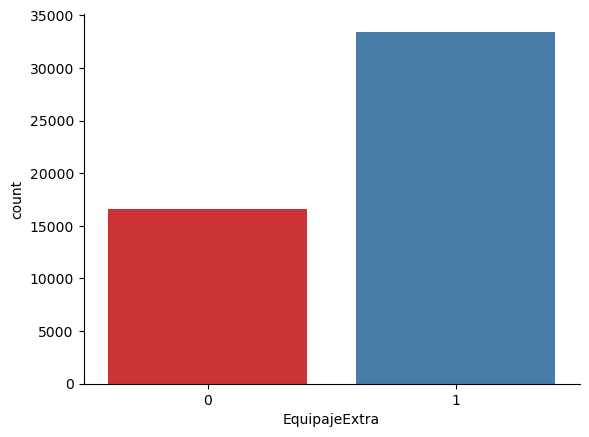

In [34]:
sns.countplot(x=PasajerosAerolineas['EquipajeExtra'], palette='Set1')
sns.despine()

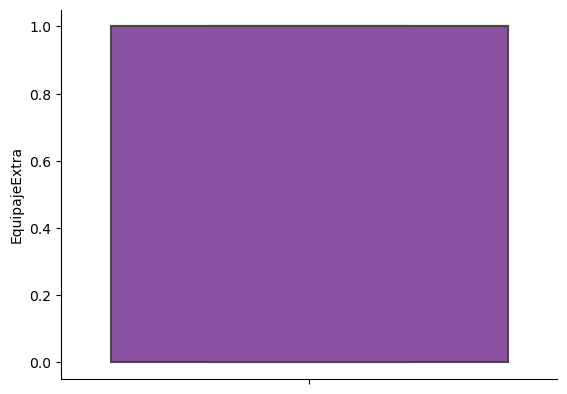

In [35]:
sns.boxplot(y = PasajerosAerolineas['EquipajeExtra'], color = "#8E44AD")
sns.despine()

In [36]:
boxplot_PasajerosAerolineas = PasajerosAerolineas.melt(id_vars='Estadia', value_vars=['EquipajeExtra'])
print(boxplot_PasajerosAerolineas)

       Estadia       variable  value
0           12  EquipajeExtra      0
1           19  EquipajeExtra      1
2           20  EquipajeExtra      0
3           22  EquipajeExtra      1
4           31  EquipajeExtra      0
...        ...            ...    ...
49997        6  EquipajeExtra      1
49998        6  EquipajeExtra      0
49999        6  EquipajeExtra      0
50000        6  EquipajeExtra      1
50001        6  EquipajeExtra      0

[50002 rows x 3 columns]


In [37]:
boxplot_PasajerosAerolineas.head()

,Estadia,variable,value
0,12,EquipajeExtra,0
1,19,EquipajeExtra,1
2,20,EquipajeExtra,0
3,22,EquipajeExtra,1
4,31,EquipajeExtra,0


C:\Users\aldye\AppData\Local\Temp\ipykernel_13168\1722011365.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(PasajerosAerolineas.corr(),annot=True, vmax=1, vmin=-1)


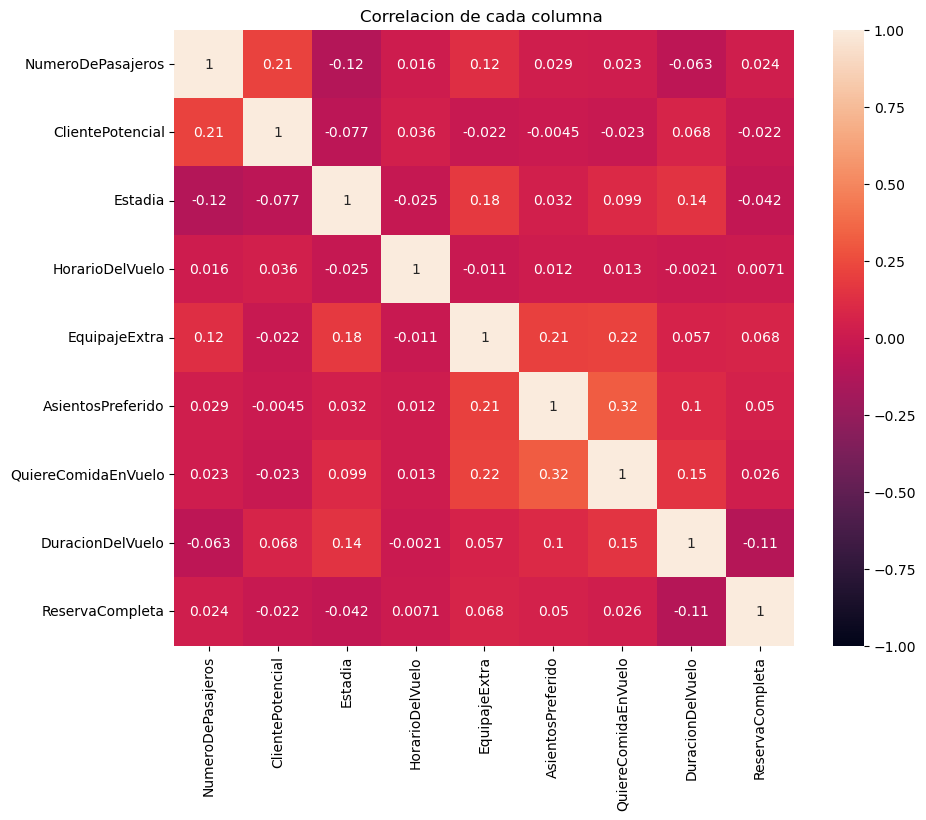

In [38]:
plt.figure(figsize=(10,8)) 
sns.heatmap(PasajerosAerolineas.corr(),annot=True, vmax=1, vmin=-1)
plt.title("Correlacion de cada columna ")
plt.show()

* Visualizamos la correlacion por cada columna

### Procesamiento y transformacion de los datos

In [39]:
PasajerosAerolineas['CanalDeVenta']= PasajerosAerolineas['CanalDeVenta'].apply(lambda x: 0 if x == 'Mobile' else 1)

In [40]:
from sklearn.preprocessing import LabelEncoder


In [41]:
TipoDeViaje = LabelEncoder()

In [42]:
PasajerosAerolineas['TipoDeViaje'] = TipoDeViaje.fit_transform(PasajerosAerolineas['TipoDeViaje'])

In [43]:
DiaDelVuelo = LabelEncoder()

In [44]:
PasajerosAerolineas['DiaDelVuelo'] = DiaDelVuelo.fit_transform(PasajerosAerolineas['DiaDelVuelo'])

In [45]:
OrigenReserva = LabelEncoder()

In [46]:
PasajerosAerolineas['OrigenReserva'] = OrigenReserva.fit_transform(PasajerosAerolineas['OrigenReserva'])

In [47]:
Ruta = LabelEncoder()

In [48]:
PasajerosAerolineas['Ruta'] = Ruta.fit_transform(PasajerosAerolineas['Ruta'])

In [49]:
PasajerosAerolineas.dtypes

NumeroDePasajeros        int64
CanalDeVenta             int64
TipoDeViaje              int32
ClientePotencial         int64
Estadia                  int64
HorarioDelVuelo          int64
DiaDelVuelo              int32
Ruta                     int32
OrigenReserva            int32
EquipajeExtra            int64
AsientosPreferido        int64
QuiereComidaEnVuelo      int64
DuracionDelVuelo       float64
ReservaCompleta          int64
dtype: object

In [50]:
PasajerosAerolineas['DuracionDelVuelo'] = PasajerosAerolineas['DuracionDelVuelo'].round()

In [51]:
PasajerosAerolineas['DuracionDelVuelo'].astype(int)

0        7
1        6
2        6
3        6
4        6
        ..
49997    6
49998    6
49999    6
50000    6
50001    6
Name: DuracionDelVuelo, Length: 50002, dtype: int32

### Seleccion de target (y) y variables (X)

In [52]:
x = PasajerosAerolineas.drop(['EquipajeExtra'], axis=1)

In [53]:
x.shape

(50002, 13)

In [54]:
y = PasajerosAerolineas ['EquipajeExtra']

In [55]:
x, y = np.array(x), np.array(y)

#### Separando Train / Test

In [56]:
# Importamos la librearia para separar el dataset.
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42)

In [58]:
X_train.shape

(40001, 13)

In [59]:
X_test.shape

(10001, 13)

### Modelos

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
# metricas
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)



### Clasificador kNN

In [64]:
knn = KNeighborsClassifier()

In [65]:
# Entrenamos el modelo
knn.fit(X_train, y_train);

In [66]:
ACC_train = []
ACC_test = []

vecinos = [1, 3, 5, 10, 15, 20, 27, 50]
for n in vecinos:
    
    clf = KNeighborsClassifier(n_neighbors=n)
    
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    ACC_train.append(train_acc)
    
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    ACC_test.append(test_acc)

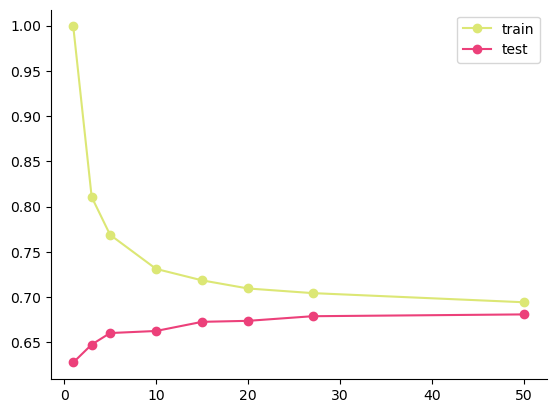

In [67]:
plt.plot(vecinos,ACC_train,'o-',label='train', color='#DCE775')
plt.plot(vecinos,ACC_test,'o-',label='test', color='#EC407A')
plt.legend()
sns.despine();

In [68]:
# Predecimos
#predicciones_pa = knn.predict(X_test)

In [69]:
#predicciones_train = knn.predict(X_train)

In [71]:
accuracy = accuracy_score(y_train, y_train_pred)*100
print(f'{round(accuracy, 2)}%')

69.43%


In [73]:
accuracy = accuracy_score(y_test, y_test_pred)*100
print(f'{round(accuracy, 2)}%')

68.09%


In [89]:
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)*100 :.2f}%")
print(f"Precision: {precision_score(y_test, y_test_pred)*100 :.2f}%")
print(f"Recall: {recall_score(y_test, y_test_pred)*100 :.2f}%")
print(f"F1 score: {f1_score(y_test, y_test_pred)*100 :.2f}%")

Accuracy: 68.09%
Precision: 70.76%
Recall: 89.11%
F1 score: 78.88%


### Random Forest

In [80]:
rf_pa = RandomForestClassifier()

In [81]:
rf_pa.fit(X_train, y_train)

RandomForestClassifier()

In [82]:
# Predecimos
predicciones_pa= rf_pa.predict(X_test)

In [83]:
predicciones_train= rf_pa.predict(X_train)

In [84]:
accuracy = accuracy_score(y_test, predicciones_pa)*100
print(f'{round(accuracy, 2)}%')

73.21%


In [85]:
accuracy = accuracy_score(y_train, predicciones_train)*100
print(f'{round(accuracy, 2)}%')

99.9%


**Metricas**

Matriz de confusión:

True Negative (TN)  |  False positive (FP)   
= = = = = = = = = = = = = = = = = = = = =       
False negative (FN) | True positive (TP) 

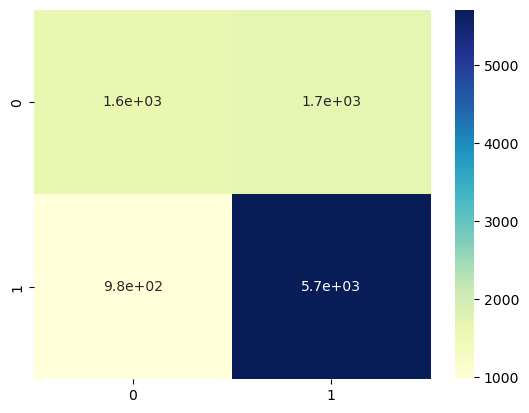

In [86]:
plt.figure()
random_confusion = confusion_matrix(y_test, predicciones_pa)
sns.heatmap(random_confusion, cmap="YlGnBu",annot=True);